## Homeless Encampments in LA

##### Spring 2025
##### Amanda Alonzo
##### I513 Usable AI
##### Indiana University, Bloomington
 



## Food distro sites count by zip code

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import re
import numpy as np
import seaborn as sns
from scipy import stats


In [3]:
raw_data_path = "../Dataraw/"
annual_data_path = "../Datafiles/"
generated_data_path = "../Datagen/"

In [15]:
#this is generated at enf of 1_eda.ipynb
# it has some features added for dates and close time in days
#write to file with new features added for next notebook: visualization
df = pd.read_csv(generated_data_path+'homeless_camp_closed_2023_parks_zip_food_ftr_eng_1.csv', low_memory=False)
df.head(1)

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,Shape__Length_y,close_time_bins,is_county_ind,park_distance_bins,closed_days_scaled,park_distance_scaled,ZIP Code,JENI Need Tier,JENI_TIER,food_center_count
0,1-3202726931,01/01/2023 08:26:17 AM,01/31/2023 01:44:42 PM,SR Created,LASAN,Homeless Encampment,Closed,Self Service,Self Service_SAN,NaN,...,2824.807047,1.0,0,2,0.039295,0.054729,90063.0,High,4.0,2.0


<Axes: xlabel='food_center_count'>

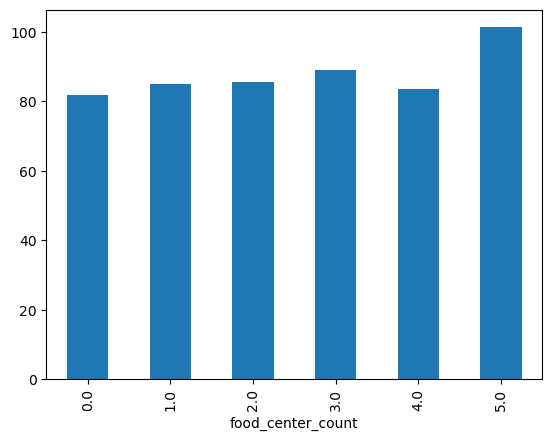

In [5]:
#plt.figure(figsize=(5, 3))
df.groupby("food_center_count")["close_time_days_x"].mean().plot( kind="bar")


<Axes: xlabel='food_center_count'>

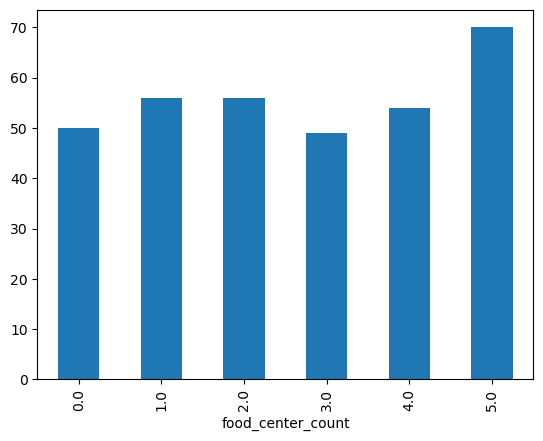

In [6]:
df.groupby("food_center_count")["close_time_days_x"].median().plot( kind="bar")


In [7]:
df.groupby("food_center_count")["close_time_days_x"].median()

food_center_count
0.0    50.0
1.0    56.0
2.0    56.0
3.0    49.0
4.0    54.0
5.0    70.0
Name: close_time_days_x, dtype: float64

<Axes: title={'center': 'close_time_days_x'}, xlabel='food_center_count'>

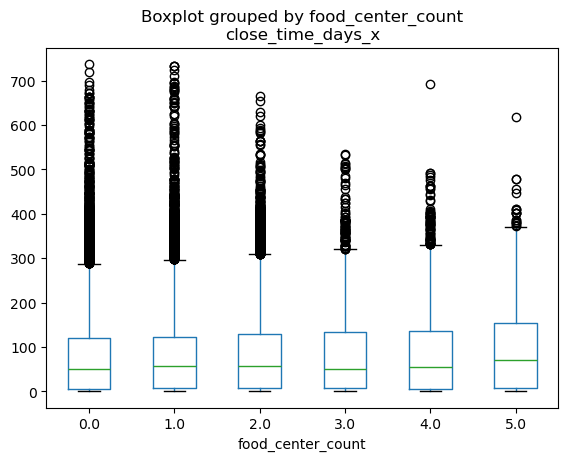

In [7]:
df.boxplot(by ='food_center_count', column =['close_time_days_x'], grid = False) 


<Axes: title={'center': 'close_time_days_x'}, xlabel='food_center_count'>

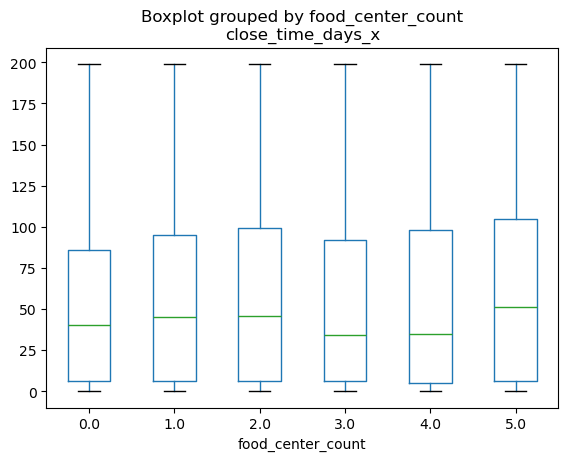

In [9]:
#remove some outliers
df[df["close_time_days_x"]<200].boxplot(by ='food_center_count', column =['close_time_days_x'], grid = False) 


In [10]:
df.groupby("food_center_count")["close_time_days_x"].median()

food_center_count
0.0    50.0
1.0    56.0
2.0    56.0
3.0    49.0
4.0    54.0
5.0    70.0
Name: close_time_days_x, dtype: float64

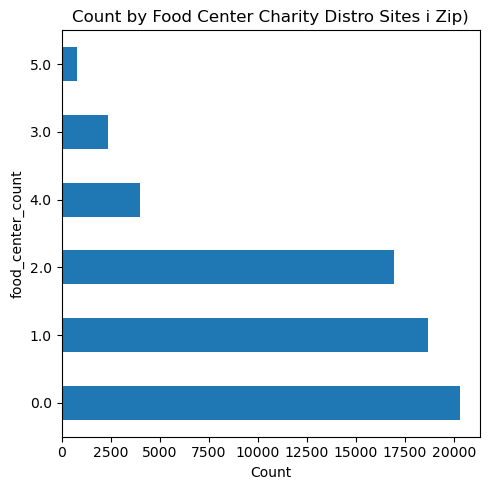

In [11]:

# plot  
plt.figure(figsize=(5, 5))
counts = df.groupby("food_center_count")["food_center_count"].count()
counts = counts.sort_values(ascending=False) 
ax = counts.plot(kind="barh")
plt.xlabel('Count')
plt.title('Count by Food Center Charity Distro Sites i Zip)')
#ax.invert_yaxis()
plt.tight_layout()
plt.show()

In [12]:
df[df["food_center_count"]==5]

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,Shape__Length_y,close_time_bins,is_county_ind,park_distance_bins,closed_days_scaled,park_distance_scaled,ZIP Code,JENI Need Tier,JENI_TIER,food_center_count
150,1-3208577921,01/02/2023 07:06:31 PM,01/23/2023 02:38:24 PM,SR Created,LASAN,Homeless Encampment,Closed,Self Service,Self Service,NaN,...,739.387095,1.0,1,2,0.027100,0.046070,91335.0,High,4.0,5.0
151,1-3208580831,01/02/2023 07:07:59 PM,01/24/2023 08:28:32 AM,SR Created,LASAN,Homeless Encampment,Closed,Self Service,Self Service,NaN,...,739.387095,1.0,1,2,0.029810,0.048615,91335.0,High,4.0,5.0
249,1-3213489411,01/03/2023 12:02:06 PM,02/10/2024 03:34:05 PM,SR Created,LASAN,Homeless Encampment,Closed,Call,ITA,NaN,...,739.387095,5.0,1,2,0.544715,0.030113,91335.0,High,4.0,5.0
280,1-3216034061,01/03/2023 02:52:23 PM,04/25/2023 03:25:27 PM,SR Created,LASAN,Homeless Encampment,Closed,Mobile App,Self Service,iOS,...,739.387095,3.0,1,1,0.151762,0.016991,91335.0,High,4.0,5.0
312,1-3218195951,01/03/2023 06:45:57 PM,01/09/2023 07:22:46 AM,SR Created,LASAN,Homeless Encampment,Closed,Self Service,Self Service,NaN,...,739.387095,NaN,1,1,0.008130,0.028249,91335.0,High,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61374,1-4587015531,12/19/2023 08:07:29 AM,02/28/2024 02:11:14 PM,SR Created,LASAN,Homeless Encampment,Closed,Mobile App,Self Service,Android,...,739.387095,2.0,1,1,0.094851,0.022346,91335.0,High,4.0,5.0
61926,1-4591590431,12/22/2023 09:20:55 AM,02/14/2024 02:11:22 PM,SR Created,LASAN,Homeless Encampment,Closed,Self Service,Self Service,NaN,...,739.387095,2.0,1,2,0.071816,0.033864,91335.0,High,4.0,5.0
62053,1-4592799891,12/23/2023 01:01:26 PM,12/29/2023 08:39:44 PM,SR Created,LASAN,Homeless Encampment,Closed,Mobile App,Self Service,iOS,...,739.387095,NaN,1,1,0.008130,0.019461,91335.0,High,4.0,5.0
62274,1-4594363441,12/26/2023 01:52:06 PM,12/29/2023 08:39:34 PM,SR Created,LASAN,Homeless Encampment,Closed,Self Service,Self Service,NaN,...,739.387095,NaN,1,1,0.004065,0.019461,91335.0,High,4.0,5.0


In [13]:
df["food_center_count"].value_counts()

food_center_count
0.0    20309
1.0    18700
2.0    16929
4.0     4003
3.0     2358
5.0      805
Name: count, dtype: int64

In [14]:
df.groupby(["food_center_count"]).JENI_TIER.value_counts()

food_center_count  JENI_TIER
0.0                5.0          7731
                   3.0          6088
                   2.0          4097
                   1.0          1210
                   4.0          1155
1.0                5.0          8648
                   2.0          4705
                   4.0          2949
                   3.0          2367
                   1.0            31
2.0                5.0          7640
                   4.0          6359
                   3.0          2045
                   2.0           885
3.0                4.0          1607
                   5.0           751
4.0                4.0          2163
                   3.0          1405
                   5.0           435
5.0                4.0           805
Name: count, dtype: int64

In [15]:
df.groupby(["JENI_TIER"]).food_center_count.value_counts()

JENI_TIER  food_center_count
1.0        0.0                  1210
           1.0                    31
2.0        1.0                  4705
           0.0                  4097
           2.0                   885
3.0        0.0                  6088
           1.0                  2367
           2.0                  2045
           4.0                  1405
4.0        2.0                  6359
           1.0                  2949
           4.0                  2163
           3.0                  1607
           0.0                  1155
           5.0                   805
5.0        1.0                  8648
           0.0                  7731
           2.0                  7640
           3.0                   751
           4.0                   435
Name: count, dtype: int64

In [8]:
df.describe()

,HouseNumber_x,ZipCode,Latitude_x,Longitude_x,TBMPage_x,TBMRow_x,CD_x,NC_x,close_time_days_x,CreatedDate_YR_x,...,Shape__Area_y,Shape__Length_y,close_time_bins,is_county_ind,park_distance_bins,closed_days_scaled,park_distance_scaled,ZIP Code,JENI_TIER,food_center_count
count,48447.000000,63090.000000,63104.000000,63104.000000,63104.000000,63104.000000,63103.000000,62748.000000,63079.000000,63104.0,...,6.310400e+04,63104.000000,44749.000000,63104.000000,63104.000000,63079.000000,63104.000000,63076.000000,63076.000000,63104.000000
mean,5499.065721,90465.801886,34.089156,-118.355239,606.836936,4.172794,7.894664,57.817205,84.476212,2023.0,...,7.267870e+04,869.043098,2.401663,0.980619,0.967989,0.114466,0.023340,90465.889483,3.844679,1.262503
std,5210.949939,634.715178,0.093539,0.098925,63.801139,1.898072,4.470720,33.608650,95.161704,0.0,...,6.727675e+05,2177.352264,1.164208,0.137860,0.955762,0.128945,0.020366,634.758377,1.164308,1.202377
min,1.000000,90001.000000,33.706047,-118.666666,480.000000,1.000000,1.000000,4.000000,0.000000,2023.0,...,2.584961e+01,54.768177,1.000000,0.000000,0.000000,0.000000,0.000000,90001.000000,1.000000,0.000000
25%,1211.000000,90025.000000,34.032367,-118.423994,562.000000,3.000000,4.000000,29.000000,7.000000,2023.0,...,4.587075e+03,329.161881,1.000000,1.000000,0.000000,0.009485,0.010092,90025.000000,3.000000,0.000000
50%,3899.000000,90048.000000,34.069473,-118.329580,632.000000,4.000000,9.000000,54.000000,54.000000,2023.0,...,1.056988e+04,469.355906,2.000000,1.000000,1.000000,0.073171,0.018204,90047.000000,4.000000,1.000000
75%,8505.000000,91311.000000,34.167182,-118.279219,634.000000,6.000000,12.000000,78.000000,125.000000,2023.0,...,3.368408e+04,822.632328,3.000000,1.000000,2.000000,0.169377,0.030308,91311.000000,5.000000,2.000000
max,26404.000000,91607.000000,34.325546,-118.159403,4723.000000,7.000000,15.000000,128.000000,738.000000,2023.0,...,2.511220e+07,76809.180183,5.000000,1.000000,4.000000,1.000000,1.000000,91607.000000,5.000000,5.000000
